I first constructed annual CRFs and then calculate the orientation angles between them and ICRF3.

Here I presented the second method, which is that I use the mean positions of source within one-year windows to construct the annual CRF.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

from astropy.table import Table
import astropy.units as u

# My progs
from my_progs.catalog.read_icrf import read_icrf3
from my_progs.stat_func.rms_calc import rms_calc
from my_progs.catalog.pos_diff import radio_cat_diff_calc
from tool_func import calc_orient

In [2]:
icrf3sx = read_icrf3(wv="sx")

icrf3def = icrf3sx[icrf3sx["type"] == "D"]

In [3]:
years = np.arange(1985, 2021)
num = len(years)

In [4]:
N0 = np.zeros_like(years)
N1 = np.zeros_like(years)
pmt = np.empty((num, 3), dtype=np.float)
err = np.empty((num, 3), dtype=np.float)

In [5]:
N0_d = np.zeros_like(years)
N1_d = np.zeros_like(years)
pmt_d = np.empty((num, 3), dtype=np.float)
err_d = np.empty((num, 3), dtype=np.float)

In [6]:
for i, year in enumerate(years):
    
    print("\nProcessing time series within {:d}-{:d}".format(year, year+1))
    
    ts_sou = Table.read("../data/yearly-ts/{:d}.dat".format(year), format="ascii")
    
    # Add unit information
    ts_sou["ra"].unit = u.deg
    ts_sou["dec"].unit = u.deg
    ts_sou["ra_err"].unit = u.mas
    ts_sou["dec_err"].unit = u.mas
    
    # ICRF3 defining sources
    pos_oft = radio_cat_diff_calc(ts_sou, icrf3def, sou_name="iers_name")
    N0_d[i], N1_d[i], pmt_d[i], err_d[i] = calc_orient(pos_oft)

    # All sources
    pos_oft = radio_cat_diff_calc(ts_sou, icrf3sx, sou_name="iers_name")
    N0[i], N1[i], pmt[i], err[i] = calc_orient(pos_oft)


Processing time series within 1985-1986

Processing time series within 1986-1987

Processing time series within 1987-1988

Processing time series within 1988-1989

Processing time series within 1989-1990


/Users/Neo/.ipython/my_progs/catalog/pos_diff.py:273: RuntimeWarning: divide by zero encountered in true_divide
  ratio1 = (eema1 / eena1)**2



Processing time series within 1990-1991

Processing time series within 1991-1992

Processing time series within 1992-1993

Processing time series within 1993-1994

Processing time series within 1994-1995

Processing time series within 1995-1996

Processing time series within 1996-1997

Processing time series within 1997-1998

Processing time series within 1998-1999

Processing time series within 1999-2000

Processing time series within 2000-2001

Processing time series within 2001-2002

Processing time series within 2002-2003

Processing time series within 2003-2004

Processing time series within 2004-2005

Processing time series within 2005-2006

Processing time series within 2006-2007

Processing time series within 2007-2008

Processing time series within 2008-2009

Processing time series within 2009-2010

Processing time series within 2010-2011

Processing time series within 2011-2012

Processing time series within 2012-2013

Processing time series within 2013-2014

Processing time

# ICRF3 defining sources only

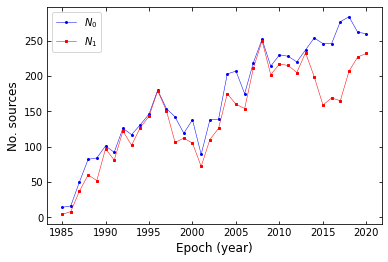

In [7]:
fig, ax = plt.subplots()

ax.plot(years, N0_d, "b-o", ms=2, lw=0.5, label="$N_0$")
ax.plot(years, N1_d, "r-s", ms=2, lw=0.5, label="$N_1$")

# ax.set_yscale("log")

ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("No. sources", fontsize=12)
ax.legend()

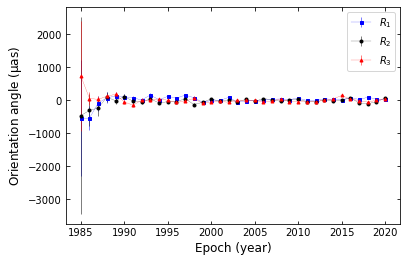

In [8]:
fig, ax = plt.subplots()

ax.errorbar(years, pmt_d[:,0], yerr=err_d[:,0], color="blue", 
            ms=3, fmt="-s", elinewidth=0.5, lw=0.2, label="$R_1$")
ax.errorbar(years, pmt_d[:,1], yerr=err_d[:,1], color="black", 
            ms=3, fmt="-o", elinewidth=0.5, lw=0.2, label="$R_2$")
ax.errorbar(years, pmt_d[:,2], yerr=err_d[:,2], color="red", 
            ms=3, fmt="-^", elinewidth=0.5, lw=0.2, label="$R_3$")

ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("Orientation angle ($\mathrm{\mu as}$)", fontsize=12)
ax.legend()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


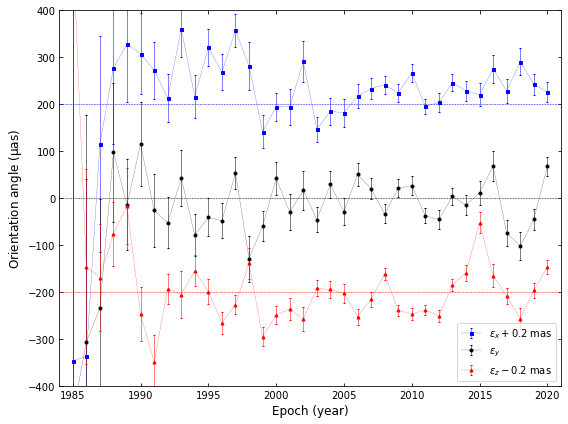

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hlines(200, 1984, 2021, ls="dashed", color="b", lw=0.5)
ax.hlines(0, 1984, 2021, ls="dashed", color="k", lw=0.5)
ax.hlines(-200, 1984, 2021, ls="dashed", color="r", lw=0.5)

ax.errorbar(years,
            pmt_d[:, 0] + 200,
            yerr=err_d[:, 0],
            color="blue",
            ms=3,
            fmt="-s",
            elinewidth=0.5,
            lw=0.2,
            label="$\\epsilon_x+0.2$ mas",
            capsize=1)
ax.errorbar(years,
            pmt_d[:, 1],
            yerr=err_d[:, 1],
            color="black",
            ms=3,
            fmt="-o",
            elinewidth=0.5,
            lw=0.2,
            label="$\\epsilon_y$",
            capsize=1)
ax.errorbar(years,
            pmt_d[:, 2] - 200,
            yerr=err_d[:, 2],
            color="red",
            ms=3,
            fmt="-^",
            elinewidth=0.5,
            lw=0.2,
            label="$\\epsilon_z-0.2$ mas",
            capsize=1)

ax.axis([1984, 2021, -400, 400])
ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("Orientation angle ($\mathrm{\mu as}$)", fontsize=12)
ax.legend()

plt.tight_layout()
plt.savefig("../plots/orient-from-yearly-ts.eps")

In [18]:
ax.hlines?

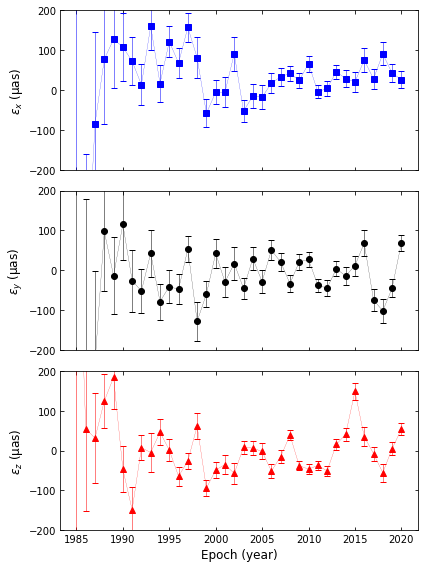

In [10]:
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 8), nrows=3, sharex=True, sharey=True)

ax0.errorbar(years,
             pmt_d[:, 0],
             yerr=err_d[:, 0],
             color="blue",
             fmt="-s",
             elinewidth=0.5,
             lw=0.2,
             label="$R_1$",
             capsize=3)
ax1.errorbar(years,
             pmt_d[:, 1],
             yerr=err_d[:, 1],
             color="black",
             fmt="-o",
             elinewidth=0.5,
             lw=0.2,
             label="$R_2$",
             capsize=3)
ax2.errorbar(years,
             pmt_d[:, 2],
             yerr=err_d[:, 2],
             color="red",
             fmt="-^",
             elinewidth=0.5,
             lw=0.2,
             label="$R_3$",
             capsize=3)


ax2.set_xlabel("Epoch (year)", fontsize=12)
ax0.set_ylabel("$\\epsilon_x$ ($\mathrm{\mu as}$)", fontsize=12)
ax1.set_ylabel("$\\epsilon_y$ ($\mathrm{\mu as}$)", fontsize=12)
ax2.set_ylabel("$\\epsilon_z$ ($\mathrm{\mu as}$)", fontsize=12)

ax2.set_ylim([-200, 200])


plt.tight_layout()
# plt.savefig("../plots/orient-from-yearly-ts.eps")

In [11]:
wmean1, wrms1, wstd1 = rms_calc(pmt_d[:,0])
wmean2, wrms2, wstd2 = rms_calc(pmt_d[:,1])
wmean3, wrms3, wstd3 = rms_calc(pmt_d[:,2])

print("No weighted")
print("    Mean   RMS  Std")
print("    uas    uas  uas")
print("R1  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

No weighted
    Mean   RMS  Std
    uas    uas  uas
R1    +9   147  146
R2   -34   115  110
R3   +22   142  140


In [12]:
wmean1, wrms1, wstd1 = rms_calc(pmt_d[:,0], err_d[:,0])
wmean2, wrms2, wstd2 = rms_calc(pmt_d[:,1], err_d[:,1])
wmean3, wrms3, wstd3 = rms_calc(pmt_d[:,2], err_d[:,2])

print("Weighted")
print("    Mean  WRMS Std")
print("    uas   uas  uas")
print("R1  {:+4.0f}  {:.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

Weighted
    Mean  WRMS Std
    uas   uas  uas
R1   +30  50  41
R2    -8  46  45
R3   -11  47  46


# All sources

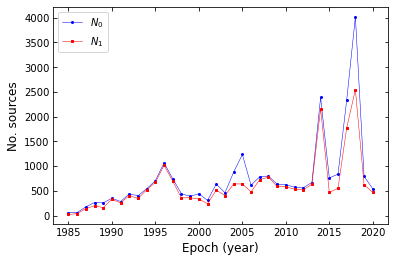

In [13]:
fig, ax = plt.subplots()

ax.plot(years, N0, "b-o", ms=2, lw=0.5, label="$N_0$")
ax.plot(years, N1, "r-s", ms=2, lw=0.5, label="$N_1$")

# ax.set_yscale("log")

ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("No. sources", fontsize=12)
ax.legend()

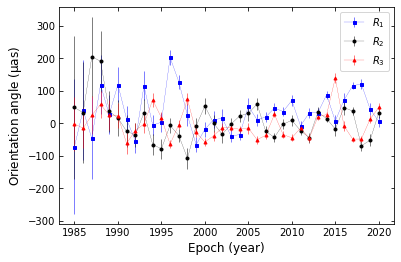

In [14]:
fig, ax = plt.subplots()

ax.errorbar(years, pmt[:,0], yerr=err[:,0], color="blue", 
            ms=3, fmt="-s", elinewidth=0.5, lw=0.2, label="$R_1$")
ax.errorbar(years, pmt[:,1], yerr=err[:,1], color="black", 
            ms=3, fmt="-o", elinewidth=0.5, lw=0.2, label="$R_2$")
ax.errorbar(years, pmt[:,2], yerr=err[:,2], color="red", 
            ms=3, fmt="-^", elinewidth=0.5, lw=0.2, label="$R_3$")

ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("Orientation angle ($\mathrm{\mu as}$)", fontsize=12)
ax.legend()

In [15]:
wmean1, wrms1, wstd1 = rms_calc(pmt[:,0])
wmean2, wrms2, wstd2 = rms_calc(pmt[:,1])
wmean3, wrms3, wstd3 = rms_calc(pmt[:,2])

print("No weighted")
print("    Mean   RMS  Std")
print("    uas    uas  uas")
print("R1  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

No weighted
    Mean   RMS  Std
    uas    uas  uas
R1   +34    71  62
R2    +6    63  62
R3    -3    44  44


In [16]:
wmean1, wrms1, wstd1 = rms_calc(pmt[:,0], err[:,0])
wmean2, wrms2, wstd2 = rms_calc(pmt[:,1], err[:,1])
wmean3, wrms3, wstd3 = rms_calc(pmt[:,2], err[:,2])

print("Weighted")
print("    Mean  WRMS Std")
print("    uas   uas  uas")
print("R1  {:+4.0f}  {:.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

Weighted
    Mean  WRMS Std
    uas   uas  uas
R1   +43  70  55
R2    -5  39  39
R3   -13  41  39
